In [36]:
import numpy as np
import sep

In [37]:
# more setup for reading the image and showing the plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

%matplotlib inline

rcParams['figure.figsize']=[10.0, 8.0]

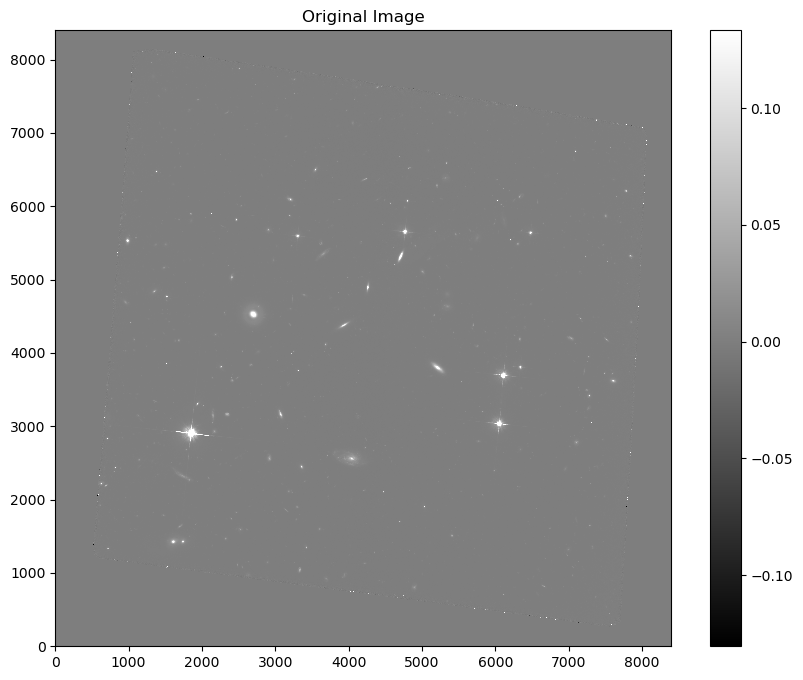

In [38]:
# read image into standard 2-d numpy array 
data = fits.open("/Users/hassanafify/Desktop/ASTR19/hlsp_hudf12_hst_acs_udfpar2_f814w_v1.0_drz.fits")[0].data

# "image_data" now contains the image data as a NumPy array
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.title("Original Image")
plt.savefig("original_image.png")

Global Background: -1.643013547436567e-07
Global Background RMS: 0.00022249497123993933


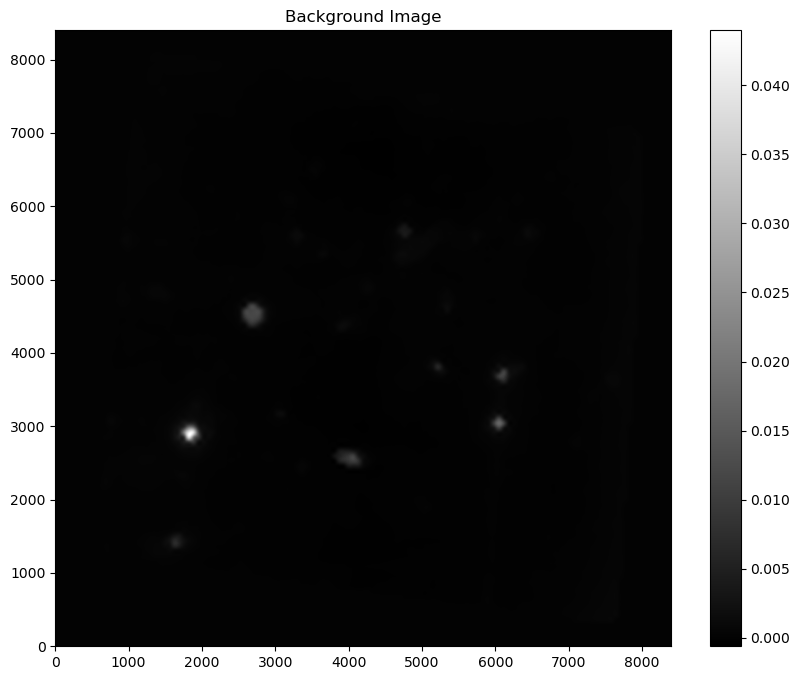

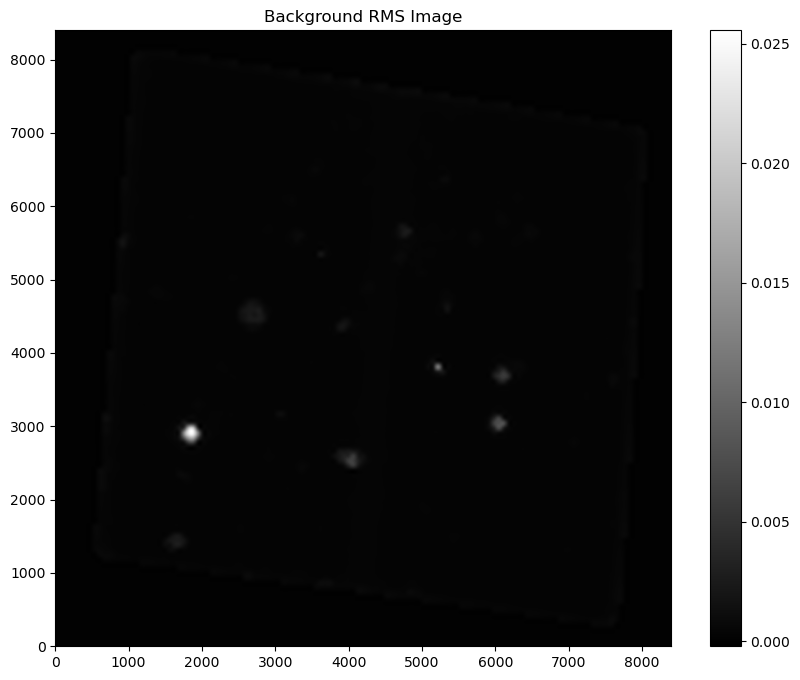

In [44]:
# changing the byte order of the array 'data'
data = data.byteswap().newbyteorder()
# measure a spatially background on the image
bkg = sep.Background(data)

# Display global background statistics
print("Global Background:", bkg.globalback)
print("Global Background RMS:", bkg.globalrms)

# Get the 2D background and noise
bkg_image = bkg.back()
bkg_rms = bkg.rms()

# Display the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Image")
plt.savefig("background_image.png")
plt.show()

# Display the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background RMS Image")
plt.savefig("background_rms_image.png")
plt.show()


# Subtract the background
data_sub = data - bkg


('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

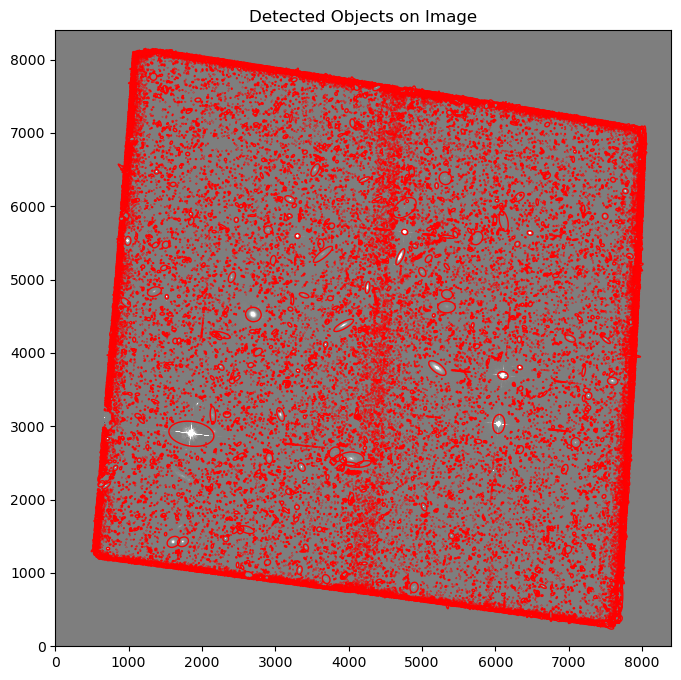

In [40]:
sep.set_extract_pixstack(600000)
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
len(objects)

from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title("Detected Objects on Image")
plt.savefig("detected_objects_on_image.png")


# available fields
objects.dtype.names


In [35]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

data = data.byteswap(inplace=True).newbyteorder()

objects = sep.extract(data_sub, thresh=1.5, err=bkg.globalrms)
print(f"Detected {len(objects)} objects.")

object 0: flux = 0.024498 +/- 0.156523
object 1: flux = 0.013350 +/- 0.115547
object 2: flux = 0.017066 +/- 0.130641
object 3: flux = 0.010770 +/- 0.103786
object 4: flux = 0.010220 +/- 0.101100
object 5: flux = -0.004453 +/- 0.001181
object 6: flux = 0.044866 +/- 0.211818
object 7: flux = 0.021514 +/- 0.146681
object 8: flux = 0.045023 +/- 0.212189
object 9: flux = -0.009641 +/- 0.001185
Detected 51180 objects.


<Figure size 1000x800 with 0 Axes>